In [1]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


/content/gdrive/My Drive/그룹IT신기술사관학교_공유폴더/Hana_Class_E/Sample_Code/0502/00_data/

# New Section

In [4]:
import os
os.chdir("/content/gdrive/My Drive/그룹IT신기술사관학교_공유폴더/Hana_Class_E/Sample_Code/0502/00_data/")
cwd = os.getcwd()
print(cwd)
#!ls "gdrive/My Drive/99_Jinkyu/Blockdeal/day/" -al; 
#wd = "/content/gdrive/My Drive/99_Jinkyu/Blockdeal/day/"

/content/gdrive/My Drive/그룹IT신기술사관학교_공유폴더/Hana_Class_E/Sample_Code/0502/00_data


In [5]:
!ls -al

total 27931
-rw------- 1 root root    45606 Apr 11 06:09 bird_small.mat
-rw------- 1 root root    33031 Apr 11 06:09 bird_small.png
-rw------- 1 root root      393 Apr 11 06:10 emailSample1.txt
-rw------- 1 root root     1301 Apr 11 06:10 emailSample2.txt
-rw------- 1 root root     1359 Apr 11 06:09 ex1data1.txt
-rw------- 1 root root      657 Apr 11 06:10 ex1data2.txt
-rw------- 1 root root     3775 Apr 11 06:11 ex2data1.txt
-rw------- 1 root root     2233 Apr 11 06:11 ex2data2.txt
-rw------- 1 root root  7511764 Apr 11 06:13 ex3data1.mat
-rw------- 1 root root    79592 Apr 11 06:11 ex3weights.mat
-rw------- 1 root root  7511764 Apr 11 06:13 ex4data1.mat
-rw------- 1 root root    79592 Apr 11 06:13 ex4weights.mat
-rw------- 1 root root     1321 Apr 11 06:13 ex5data1.mat
-rw------- 1 root root      981 Apr 11 06:13 ex6data1.mat
-rw------- 1 root root     7604 Apr 11 06:14 ex6data2.mat
-rw------- 1 root root     6038 Apr 11 06:14 ex6data3.mat
-rw------- 1 root root      995 Apr 11 06:14

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

raw_data = loadmat('ex6data1.mat')
raw_data

{'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057  , 2.3853  ],
        [1.8721  , 2.0577  ],
        [2.0103  , 2.3546  ],
        [1.2269  , 2.3239  ],
        [1.8951  , 2.9174  ],
     

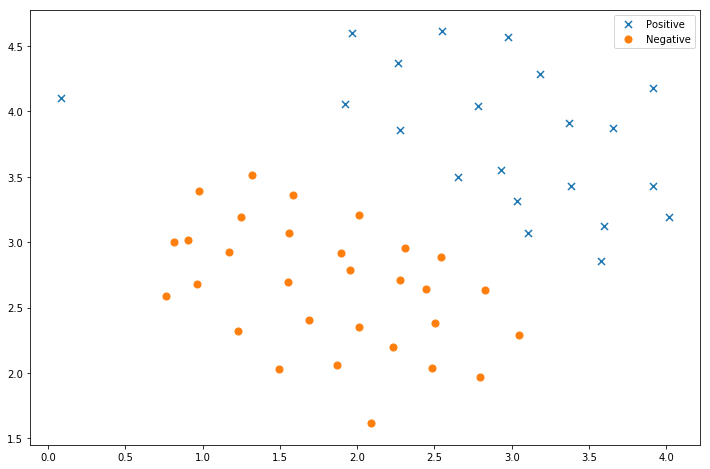

In [0]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()

In [0]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [0]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

In [0]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9411764705882353

Text(0.5, 1.0, 'SVM (C=1) Decision Confidence')

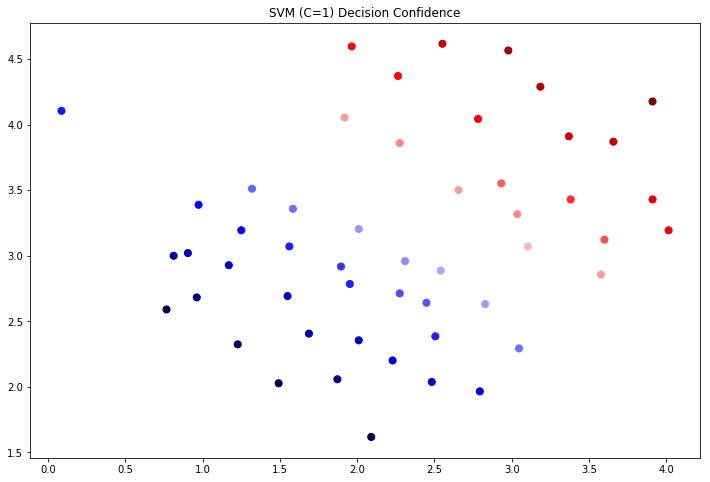

In [0]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')

Text(0.5, 1.0, 'SVM (C=100) Decision Confidence')

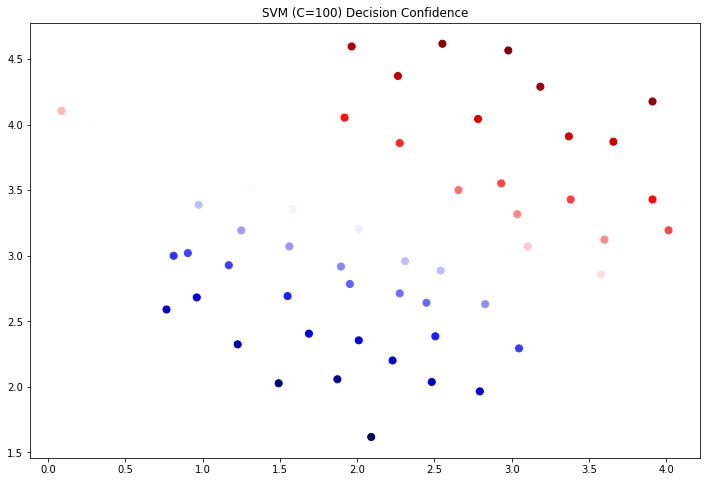

In [0]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')

# Divide Test and Train Set 

In [0]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))

x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2
gaussian_kernel(x1, x2, sigma)

0.32465246735834974

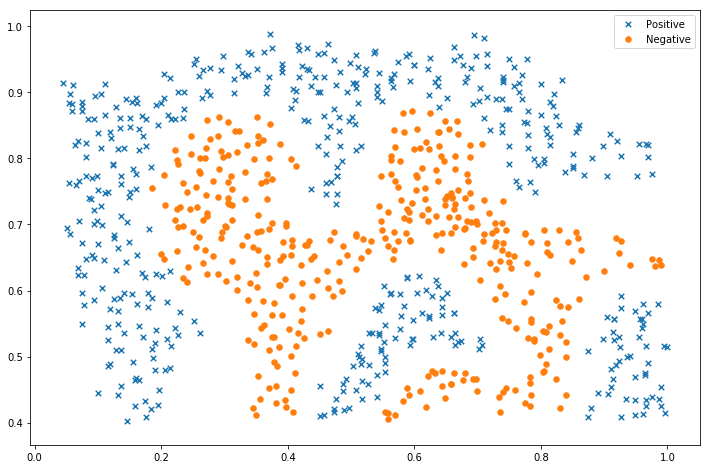

In [0]:
raw_data = loadmat('ex6data2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()

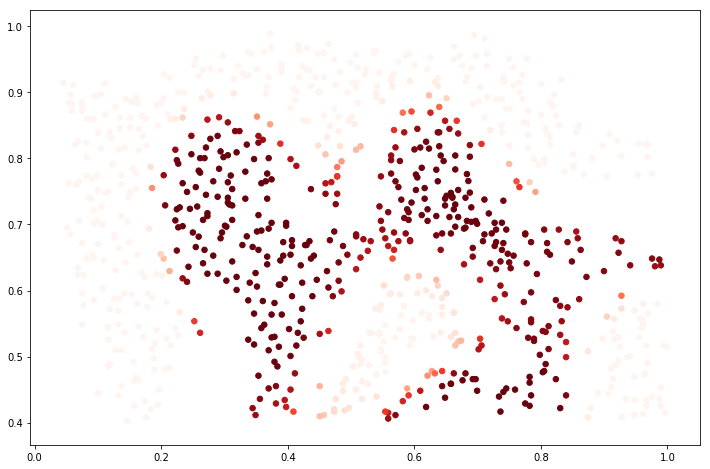

In [0]:
svc = svm.SVC(C=100, gamma=10, probability=True)
svc.fit(data[['X1', 'X2']], data['y'])
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')

In [0]:
raw_data = loadmat('ex6data3.mat')

X = raw_data['X']
Xval = raw_data['Xval']
y = raw_data['y'].ravel()
yval = raw_data['yval'].ravel()

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params

(0.965, {'C': 0.3, 'gamma': 100})

In [0]:
spam_train = loadmat('spamTrain.mat')
spam_test = loadmat('spamTest.mat')

In [0]:
spam_train

{'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 'y': array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=uint8)}

In [0]:
X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

X.shape, y.shape, Xtest.shape, ytest.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

In [0]:
svc = svm.SVC()
svc.fit(X, y)
print('Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2)))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Test accuracy = 95.3%
